#  Multi-class Classification

Estimated time needed: **30** mins

In this lab, you will learn the different strategies of Multi-class classification and implement the same on a real-world dataset.

## **Objectives**

Sau khi hoàn thành sinh viên có thể

1. Hiểu cách sử dụng mã hóa one-hot (one-hot encoding) cho các biến phân loại.
2. Triển khai hồi quy logistic cho bài toán phân loại đa lớp bằng các chiến lược One-vs-All (OvA) và One-vs-One (OvO).
3. Đánh giá hiệu suất mô hình bằng các chỉ số phù hợp.


## Import Necessary Libraries

First, to ensure the availability of the required libraries, execute the cell below.

In [ ]:
%pip install numpy==2.2.0
%pip install pandas==2.2.3
%pip install scikit-learn==1.6.0
%pip install matplotlib==3.9.3
%pip install seaborn==0.13.2

Import libraries for data processing, model training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

## Dataset
The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license.

Dataset gồm 17 thuộc tính với tổng 2,111 mẫu.

Thuộc tính được trình bày bảng bên dưới


### Dataset Variables Documentation

| Variable Name | Type | Description |
|---|---|---|
| Gender | Categorical | Gender of the individual |
| Age | Continuous | Age in years |
| Height | Continuous | Height in meters |
| Weight | Continuous | Weight in kilograms |
| family_history_with_overweight | Binary | Has a family member suffered or suffers from overweight? |
| FAVC | Binary | Do you eat high caloric food frequently? |
| FCVC | Integer | Do you usually eat vegetables in your meals? |
| NCP | Continuous | How many main meals do you have daily? |
| CAEC | Categorical | Do you eat any food between meals? |
| SMOKE | Binary | Do you smoke? |
| CH2O | Continuous | How much water do you drink daily? |
| SCC | Binary | Do you monitor the calories you eat daily? |
| FAF | Continuous | How often do you have physical activity? |
| TUE | Integer | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC | Categorical | How often do you drink alcohol? |
| MTRANS | Categorical | Which transportation do you usually use? |
| NObeyesdad | Categorical | Obesity level |


### Load the dataset

Load the data

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis
Trực quan hóa phân bố của biến mục tiêu để hiểu mức độ cân bằng giữa các lớp


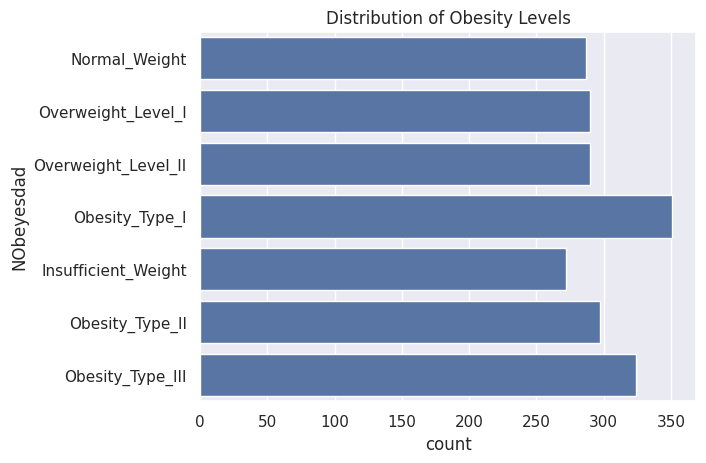

In [4]:
# Distribution of target variable
sns.countplot(y="NObeyesdad", data=data)
plt.title("Distribution of Obesity Levels")
plt.show()

Điều này cho thấy bộ dữ liệu khá cân bằng và không cần xử lý đặc biệt liên quan đến việc đào tạo bị lệch.


## Exercise 1
Kiểm tra null values, và hiển thị tóm tắt thông tin về dataset (use `.info()` and `.describe()` methods).


In [5]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

<details><summary>Click here for the solution</summary>

```python
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())
```
</details>


Kết quả mong đợi:

Số lượng giá trị null của từng cột (khả năng cao là bằng 0 đối với bộ dữ liệu này).

Thông tin về bộ dữ liệu, bao gồm tên cột, kiểu dữ liệu và mức sử dụng bộ nhớ.

Thống kê mô tả cho các cột dạng số.


## Preprocessing the data

### Feature scaling
Chuẩn hóa các đặc trưng số để đưa chúng về cùng thang đo, giúp mô hình hoạt động hiệu quả hơn

In [6]:
# Chuẩn hóa các đặc trưng số liên tục
continuous_columns = data.select_dtypes(include=["float64"]).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Chuyển sang dataframe
scaled_df = pd.DataFrame(
    scaled_features, columns=scaler.get_feature_names_out(continuous_columns)
)

# Kết hợp với bộ dữ liệu gốc
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

Việc chuẩn hóa dữ liệu rất quan trọng để xác định ranh giới quyết định giữa các lớp tốt hơn bằng cách đảm bảo rằng các biến đặc trưng có độ biến thiên trên cùng một thang đo. Dữ liệu hiện đã sẵn sàng để được sử dụng cho bước huấn luyện và kiểm thử mô hình


### One-hot encoding
Chuyển đổi các biến phân loại sang dạng số bằng phương pháp mã hóa one-hot.


In [7]:
# Xác định các cột phân loại.
categorical_columns = scaled_data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns.remove("NObeyesdad")  # Exclude target column

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# chuyển sang dataframe
encoded_df = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(categorical_columns)
)

# Kết hợp với tập dữ liệu gốc
prepped_data = pd.concat(
    [scaled_data.drop(columns=categorical_columns), encoded_df], axis=1
)

Ta thấy rằng tất cả các biến phân loại hiện đã được chuyển thành các đặc trưng mã hóa one-hot. Điều này làm tăng tổng số trường lên 24


### Encode the target variable


In [8]:
# Mã hóa target variable
prepped_data["NObeyesdad"] = prepped_data["NObeyesdad"].astype("category").cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Separate the input and target data


In [9]:
# Preparing final dataset
X = prepped_data.drop("NObeyesdad", axis=1)
y = prepped_data["NObeyesdad"]

## Model training and evaluation 


### Splitting the data set
Chia tập train test 80/20


In [10]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Logistic Regression with One-vs-All
Trong phương pháp One-vs-All (OvA):

Thuật toán huấn luyện một bộ phân loại nhị phân cho mỗi lớp.

Mỗi bộ phân loại học cách phân biệt một lớp duy nhất với tất cả các lớp còn lại gộp chung.

Nếu có k lớp, thì sẽ huấn luyện k bộ phân loại.

Khi dự đoán, thuật toán đánh giá tất cả các bộ phân loại trên mỗi mẫu đầu vào và chọn lớp có điểm tự tin (confidence score) cao nhất làm kết quả dự đoán.

Ưu điểm:

Đơn giản và hiệu quả hơn về số lượng bộ phân loại (k).

Dễ triển khai đối với các thuật toán vốn cung cấp điểm tự tin tự nhiên (như logistic regression, SVM).

Nhược điểm:

Các bộ phân loại có thể gặp khó khăn với mất cân bằng lớp, vì mỗi mô hình phải phân biệt một lớp nhỏ với tất cả các lớp còn lại gộp lại.

Đòi hỏi mô hình phải hoạt động tốt ngay cả khi dữ liệu bất cân bằng nghiêm trọng, do nhóm “all” thường có số mẫu lớn hơn nhiều so với nhóm “one”.

Train a logistic regression model using the One-vs-All strategy and evaluate its performance.


In [11]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class="ovr", max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

Đánh giá trên tập test


In [12]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ova), 2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic Regression with OvO

Trong phương pháp One-vs-One (OvO):

Thuật toán huấn luyện một bộ phân loại nhị phân cho từng cặp lớp trong bộ dữ liệu.

Nếu có k lớp, tổng số bộ phân loại được huấn luyện sẽ là:
* $k(k-1)/2$

Mỗi bộ phân loại được huấn luyện để phân biệt hai lớp cụ thể, bỏ qua tất cả các lớp còn lại.

Khi dự đoán, tất cả các bộ phân loại sẽ được sử dụng và kết quả cuối cùng được xác định bằng cơ chế bỏ phiếu, chọn lớp thắng nhiều lần nhất trong các cặp so sánh.

Ưu điểm:

Phù hợp với các thuật toán có chi phí huấn luyện cao, vì mỗi bộ phân loại chỉ làm việc với một phần nhỏ của dữ liệu (chỉ gồm hai lớp).

Trong nhiều trường hợp có thể chính xác hơn, vì mỗi bộ phân loại chỉ tập trung vào việc phân biệt một cặp lớp duy nhất.

Nhược điểm:

Tốn kém về tính toán khi số lượng lớp lớn do số mô hình phải huấn luyện tăng rất nhanh.

Có thể dẫn đến dự đoán mơ hồ nếu kết quả bỏ phiếu bị hòa (tie).

Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.


In [13]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

Đánh giá trên tập test


In [14]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ovo), 2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


## Exercises

### Q1. Thử nghiệm với các tỷ lệ test khác nhau trong hàm train_test_split (ví dụ: 0.1, 0.3) và quan sát ảnh hưởng của chúng đến hiệu suất mô hình

In [24]:
def test_test_split(text_size: float = 0.2):
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X, y, test_size=text_size, random_state=42, stratify=y
    )

    # Model One-vs-All
    model_ova_s = LogisticRegression(multi_class="ovr", max_iter=1000)
    model_ova_s.fit(X_train_s, y_train_s)

    # Predictions
    y_pred_ova_s = model_ova_s.predict(X_test_s)
    # Evaluation metrics for OvA
    print("One-vs-All (OvA) Strategy")
    print(f"Accuracy: {np.round(100 * accuracy_score(y_test_s, y_pred_ova_s), 2)}%")

    # Model One-vs-One
    model_ovo_s = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo_s.fit(X_train_s, y_train_s)
    # Predictions
    y_pred_ovo_s = model_ovo_s.predict(X_test_s)

    # Evaluation metrics for OvO
    print("One-vs-One (OvO) Strategy")
    print(f"Accuracy: {np.round(100 * accuracy_score(y_test_s, y_pred_ovo_s), 2)}%")

#### Test size 0.1

In [25]:
test_test_split(text_size=0.1)

One-vs-All (OvA) Strategy
Accuracy: 75.94%
One-vs-One (OvO) Strategy
Accuracy: 90.57%


#### Test size 0.3

In [26]:
test_test_split(text_size=0.3)

One-vs-All (OvA) Strategy
Accuracy: 74.92%
One-vs-One (OvO) Strategy
Accuracy: 90.85%


### Q2. Vẽ biểu đồ cột (bar chart) thể hiện mức độ quan trọng của các đặc trưng bằng cách sử dụng các hệ số (coefficients) từ mô hình hồi quy logistic One-vs-All. 

Đồng thời, hãy thử thực hiện điều này cho mô hình One-vs-One.


#### One-vs-All

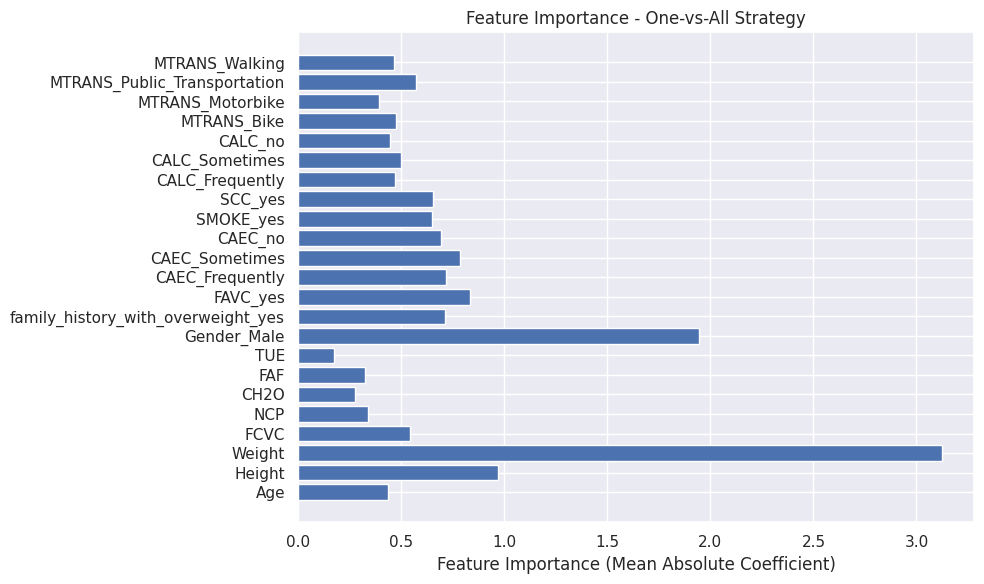

In [28]:
# Tính feature importance từ coefficients của model OvA
# model_ova.coef_ có shape (n_classes, n_features)
# Lấy trung bình absolute value của các coefficients qua tất cả các lớp
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance (Mean Absolute Coefficient)")
plt.title("Feature Importance - One-vs-All Strategy")
plt.tight_layout()
plt.show()

#### One-vs-One

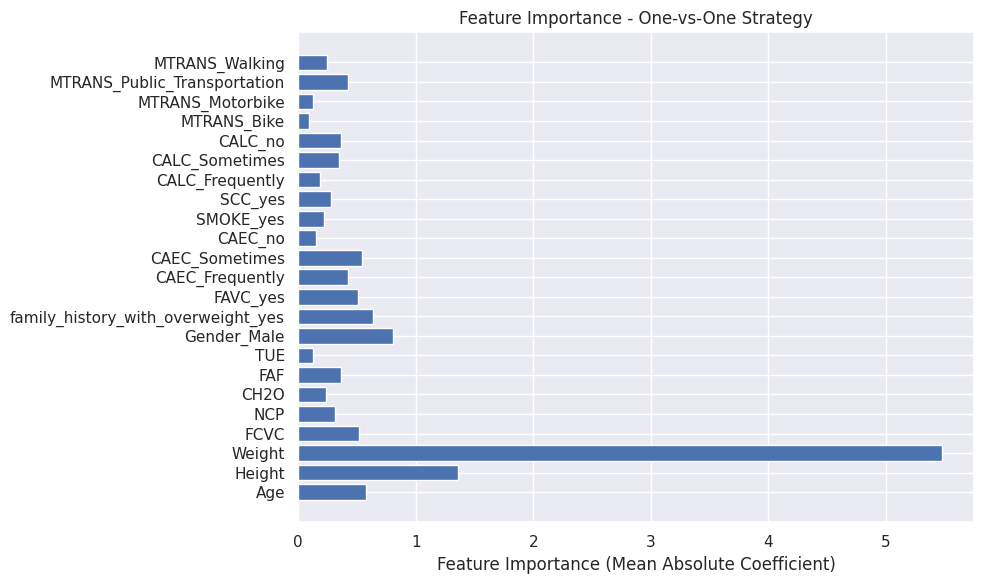

In [29]:
# Tính feature importance từ tất cả các estimators trong OvO
# Mỗi estimator là một bộ phân loại nhị phân cho một cặp lớp
all_coefs = []
for estimator in model_ovo.estimators_:
    # Lấy absolute value của coefficients
    coef = np.abs(estimator.coef_).flatten()  # type: ignore
    all_coefs.append(coef)

# Tính trung bình của tất cả các coefficients
feature_importance_ovo = np.mean(all_coefs, axis=0)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance_ovo)
plt.xlabel("Feature Importance (Mean Absolute Coefficient)")
plt.title("Feature Importance - One-vs-One Strategy")
plt.tight_layout()
plt.show()

### Q3. Hãy viết một hàm obesity_risk_pipeline để tự động hóa toàn bộ quy trình:

1. Tải và tiền xử lý dữ liệu

2. Huấn luyện mô hình

3. Đánh giá mô hình

Hàm này cần nhận đường dẫn tệp (file path) và kích thước tập kiểm thử (test set size) làm tham số đầu vào.


In [31]:
# write your function here and then execute this cell
def obesity_risk_pipeline(data_path, test_size=0.2):
    data = pd.read_csv(data_path)

    # Pre-processing
    # Feature scaling
    continuous_columns = data.select_dtypes(include="float64").columns.tolist()

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])

    scaled_df = pd.DataFrame(
        scaled_features, columns=scaler.get_feature_names_out(continuous_columns)
    )

    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # One-hot encoding
    categorical_columns = scaled_data.select_dtypes(include="object").columns.tolist()
    categorical_columns.remove("NObeyesdad")

    encoder = OneHotEncoder(sparse_output=False, drop="first")
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

    encoded_df = pd.DataFrame(
        encoded_features, columns=encoder.get_feature_names_out(categorical_columns)
    )

    prepped_data = pd.concat(
        [scaled_data.drop(columns=categorical_columns), encoded_df], axis=1
    )

    # Encode the target variable
    prepped_data["NObeyesdad"] = prepped_data["NObeyesdad"].astype("category").cat.codes

    # Separate the input and target data
    X = prepped_data.drop("NObeyesdad", axis=1)
    y = prepped_data["NObeyesdad"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # One-vs-All
    model_ova = LogisticRegression(multi_class="ovr", max_iter=1000)
    model_ova.fit(X_train, y_train)

    # Predictions
    y_pred_ova = model_ova.predict(X_test)

    # Evaluation metrics for OvA
    print("One-vs-All (OvA) Strategy")
    print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ova), 2)}%")

    # One-vs-One
    model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo.fit(X_train, y_train)

    # Predictions
    y_pred_ovo = model_ovo.predict(X_test)

    # Evaluation metrics for OvO
    print("One-vs-One (OvO) Strategy")
    print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ovo), 2)}%")


obesity_risk_pipeline(file_path, test_size=0.2)

One-vs-All (OvA) Strategy
Accuracy: 76.12%
One-vs-One (OvO) Strategy
Accuracy: 92.2%
